## import statements, data imports

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import minmax_scaling
np.random.seed(0)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from google.colab import files
uploaded = files.upload()

Saving all_stocks_5yr.xlsx to all_stocks_5yr.xlsx


In [5]:
main_filename = 'all_stocks_5yr.xlsx' # mounted drive, imported through drive
df = pd.read_excel(main_filename)
df.describe()

,date,open,high,low,close,volume
count,619040,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,2015-08-18 00:48:23.494443264,83.023334,83.778311,82.256096,83.043763,4.321823e+06
min,2013-02-08 00:00:00,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,2014-05-20 00:00:00,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,2015-08-21 00:00:00,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,2016-11-15 00:00:00,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2018-02-07 00:00:00,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08
std,NaN,97.378769,98.207519,96.507421,97.389748,8.693610e+06


## remove nulls

In [6]:
df = df.dropna()

## clean / prep cols


In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df = pd.get_dummies(df, columns=['Name']) # one hot encoding Name

In [9]:
# df.drop(columns=['high', 'low']).to_csv("cleaned_features.csv", index=False) ## save clean df to local

## train test validation split


In [10]:
y = df["close"] # label
X = df.drop(columns=["close"]) # features

In [11]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80 train, 20 test
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 75% of 80% = 60% total train, 25% of 80% = 20% total val

## feature select: drop highly correlated features

In [12]:
for dataset in [X_train, X_val, X_test]:
    dataset.drop(columns=['date'], inplace=True)

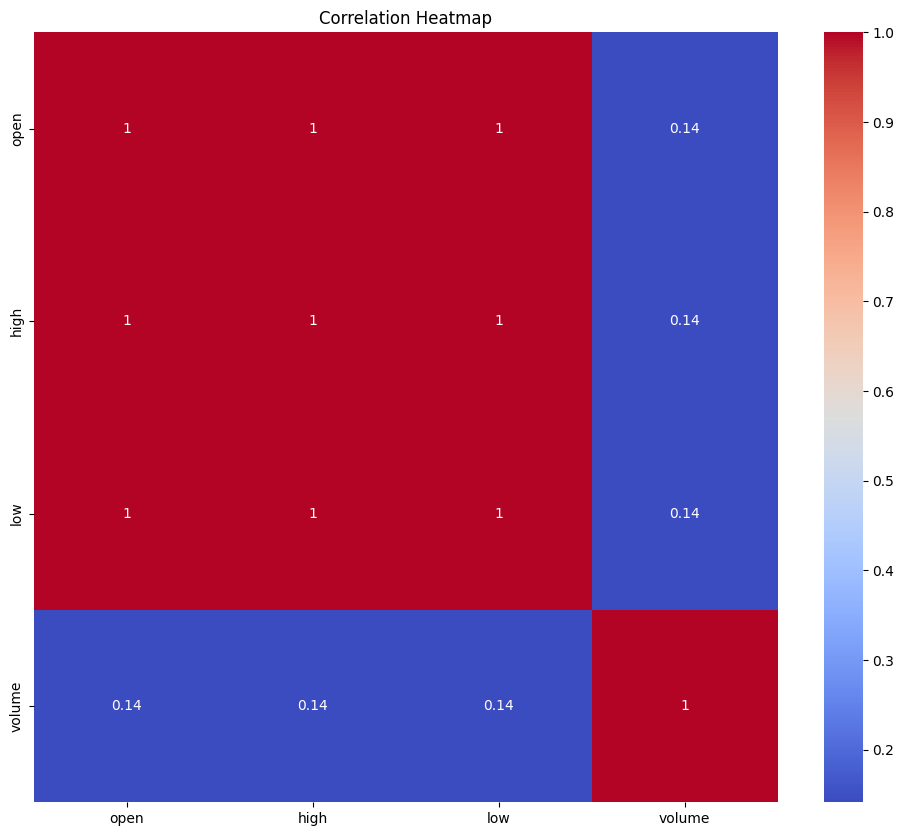

In [13]:
# creating corr matrix
numeric_X = X_train.select_dtypes(include=[float, int])
corr_matrix = numeric_X.corr().abs()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [14]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)] # cols with corr > 0.9
print("dropping the following cols:", to_drop)

# drop
X_train = X_train.drop(columns=to_drop)
X_val = X_val.drop(columns=to_drop)
X_test = X_test.drop(columns=to_drop)

dropping the following cols: ['high', 'low']


## data transform: scale data

In [15]:
scaler = StandardScaler() # standard scalar obj removes mean, scales data to unit variance

# fit scalar to train, test, and validation then transform . 'fit' calcs mean and standard dev from training data.
# X train scaled will contain scaled versions of feature sets with date removed
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## save data to local

In [22]:
# X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# X_val_df = pd.DataFrame(X_val_scaled, columns=X_val.columns)
# X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# y_train_df = pd.DataFrame(y_train, columns=['close'])
# y_val_df = pd.DataFrame(y_val, columns=['close'])
# y_test_df = pd.DataFrame(y_test, columns=['close'])

# # save to csv
# X_train_df.to_csv('X_train.csv', index=False)
# X_val_df.to_csv('X_val.csv', index=False)
# X_test_df.to_csv('X_test.csv', index=False)

# y_train_df.to_csv('y_train.csv', index=False)
# y_val_df.to_csv('y_val.csv', index=False)
# y_test_df.to_csv('y_test.csv', index=False)


**Select features & target, train/test split**

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = df[['open','high','low','volume']]
y = df[['close']]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, shuffle=True)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)




(495223, 4) (123806, 4) (495223, 1) (123806, 1)


**Train Linear Regression Model, Make Predictions, Evaluate Model Performance**

In [17]:
import math
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", math.sqrt(mse))

Mean Squared Error: 0.4696843880747419
Root Mean Squared Error: 0.6853352377302234


**Save Model**

In [18]:
import joblib
joblib.dump(model, 'Stock Market Prediction, Linear Regression')

['Stock Market Prediction, Linear Regression']

In [19]:
X_train.to_csv("X_train.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)